## Multi-class

In [1]:

# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
counter
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

/Users/emily/Desktop/Research/oversampling_python/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Counter({0: 70, 1: 76, 2: 17, 3: 13, 4: 9, 5: 29})

In [2]:
def find_maj(sample_class):  # 給 class 資料
    counter = Counter(sample_class)
    maj = list(dict(counter.most_common(1)).keys())

    print('mm', type(maj))
    # maj = "".join(maj)
    maj = " ".join('%s' % id for id in maj)
    # maj = str(maj)
    print(maj)
    return maj

In [12]:
import numpy as np
c = Counter(y)
datagap = []
countgap = []
maj = find_maj(y)
maj = maj.replace('[]', '')
print('flat', maj)
print('dd', dict(c)[0])
# maj_num = dict(c)[find_maj(output)]
maj = int(maj)
maj_num = dict(c)[maj]
for className, number in c.items():
    #print(className," ",number)
    #   print(number)
    temp = np.array([className, (maj_num - number)])
    countgap.append(maj_num - number)
    datagap.append(temp)
# return datagap
print(datagap)
max(countgap)

mm <class 'list'>
1
flat 1
dd 70
[array([0, 6]), array([1, 0]), array([ 2, 59]), array([ 3, 63]), array([ 4, 67]), array([ 5, 47])]


67

In [31]:
import smote_variants as sv
import sklearn.datasets as datasets

# dataset= datasets.load_wine()
# X, y= dataset['data'], dataset['target']

oversampler= sv.polynom_fit_SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp, y_samp= oversampler.sample(X, y)

2022-02-26 20:58:28,023:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")


In [32]:
c = Counter(y_samp)
c

Counter({0: 140, 1: 76, 2: 17, 3: 13, 4: 9, 5: 29})

In [36]:
c = Counter(y)
c

Counter({0: 70, 1: 76, 2: 17, 3: 13, 4: 9, 5: 29})

In [39]:
import smote_variants as sv
# oversampler= sv.polynom_fit_SMOTE()
oversampler= sv.MulticlassOversampling(sv.polynom_fit_SMOTE())
X_samp, y_samp= oversampler.sample(X, y)


2022-02-26 21:01:58,966:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2022-02-26 21:01:58,967:INFO:MulticlassOversampling: Sampling minority class with label: 0
2022-02-26 21:01:58,968:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2022-02-26 21:01:58,970:INFO:MulticlassOversampling: Sampling minority class with label: 5
2022-02-26 21:01:58,971:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.3821138211382114, 'topology': 'star', 'random_state': None}")
2022-02-26 21:01:58,973:INFO:MulticlassOversampling: Sampling minority class with label: 2
2022-02-26 21:01:58,974:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.2796208530805687, 'topology': 'star', 'random_state': None}")
2022-02-26 21:01:58,977:INFO:MulticlassOversampling: Sampling minority class with label: 3
2022-02-26 21:0

In [40]:
ounter = Counter(y_samp)
ounter

Counter({0: 140, 1: 76, 2: 102, 3: 91, 4: 99, 5: 87})

Class=0, n=118 (49.789%)
Class=1, n=71 (29.958%)
Class=2, n=48 (20.253%)


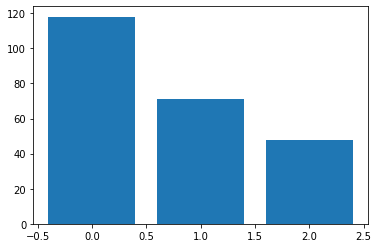

In [24]:
counter = Counter(y_samp)

for k,v in counter.items():
	per = v / len(y_samp) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=76 (16.667%)
Class=1, n=76 (16.667%)
Class=2, n=76 (16.667%)
Class=3, n=76 (16.667%)
Class=4, n=76 (16.667%)
Class=5, n=76 (16.667%)


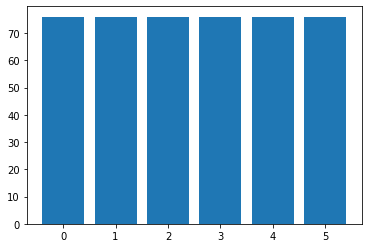

In [2]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Real data

In [63]:
import pandas as pd
df = pd.read_csv('/Users/emily/Desktop/arrhythmia.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [64]:
df.info

<bound method DataFrame.info of      0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275 

In [66]:
con = []
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if('?' is df.iloc[j,i]):
            con.append(df.columns[i])
            
        # if(isinstance(df.iloc[j,i],str)):

In [81]:
df2 = df.drop(columns=con)
df2.to_excel('/Users/emily/Desktop/arrhythmia.xlsx')

In [84]:
df2file = pd.read_excel('/Users/emily/Desktop/arrhythmia.xlsx',index_col=0)
df2file

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [70]:
for i in range(df2.shape[1]):
    for j in range(df2.shape[0]):
        # if('?' is df2.iloc[j,i]):
        if(isinstance(df2.iloc[j,i],str)):
            print("123")

In [72]:
X,y = df2.iloc[:,:-1],df2.iloc[:,-1]

In [73]:
c = Counter(y)
c

Counter({8: 2,
         6: 25,
         10: 50,
         1: 245,
         7: 3,
         14: 4,
         3: 15,
         16: 22,
         2: 44,
         4: 15,
         5: 13,
         9: 9,
         15: 5})

## Oversampling

### poly

In [75]:
import smote_variants as sv
import sklearn.datasets as datasets
from imblearn.over_sampling import SMOTE
# oversample = SMOTE()

# X_samp, y_samp = oversample.fit_resample(X, y)
import smote_variants as sv
# oversampler= sv.polynom_fit_SMOTE()
oversampler= sv.MulticlassOversampling(sv.polynom_fit_SMOTE())
X_samp, y_samp= oversampler.sample(X, y)
# summarize distribution
counter = Counter(y_samp)
counter

2022-02-28 13:50:16,761:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2022-02-28 13:50:16,805:INFO:MulticlassOversampling: Sampling minority class with label: 10
2022-02-28 13:50:16,811:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None}")
2022-02-28 13:50:16,818:INFO:MulticlassOversampling: Sampling minority class with label: 2
2022-02-28 13:50:16,820:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.45067264573991034, 'topology': 'star', 'random_state': None}")
2022-02-28 13:50:16,825:INFO:MulticlassOversampling: Sampling minority class with label: 6
2022-02-28 13:50:16,828:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.30985915492957744, 'topology': 'star', 'random_state': None}")
2022-02-28 13:50:16,833:INFO:MulticlassOversampling: Sampling minority class with label: 16
2022-02-28 

Counter({8: 250,
         6: 250,
         10: 250,
         1: 245,
         7: 252,
         14: 252,
         3: 255,
         16: 242,
         2: 264,
         4: 255,
         5: 247,
         9: 252,
         15: 250})

### SMOTE

In [79]:
import smote_variants as sv
import sklearn.datasets as datasets
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=1)

X_samp, y_samp = oversample.fit_resample(X, y)
# import smote_variants as sv
# # oversampler= sv.polynom_fit_SMOTE()
# oversampler= sv.MulticlassOversampling(sv.polynom_fit_SMOTE())
# X_samp, y_samp= oversampler.sample(X, y)
# summarize distribution
counter = Counter(y_samp)
counter

Counter({8: 245,
         6: 245,
         10: 245,
         1: 245,
         7: 245,
         14: 245,
         3: 245,
         16: 245,
         2: 245,
         4: 245,
         5: 245,
         9: 245,
         15: 245})

### Prowsyn